In [1]:
from numpy import *
import numpy as np
import scipy
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import seaborn


# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import sklearn
from sklearn import metrics

#Plotly
import plotly 
import plotly.plotly as py
from plotly.graph_objs import *
from plotly.grid_objs import Column, Grid

import sys
sys.path.append("/Users/efandel/Desktop/iPython Tools")
from rtbpythonutils import *
%matplotlib inline

In [2]:
#Hubway 2011-2012 ride data: http://hubwaydatachallenge.org/trip-history-data/
trip_data = pd.read_csv('/Users/efandel/Desktop/hubway_2011_07_through_2013_11/hubway_trips.csv')
station_data = pd.read_csv('/Users/efandel/Desktop/hubway_2011_07_through_2013_11/hubway_stations.csv')

In [3]:
#calculate the total starting rides, ending rides, and average starting trip duration

starting_stations = pd.DataFrame(trip_data.groupby(['strt_statn'],as_index=False)['seq_id'].count())
starting_stations = starting_stations.rename(columns={'strt_statn': 'id', 'seq_id': 'ride_starts'})
ending_stations = pd.DataFrame(trip_data.groupby(['end_statn'],as_index=False)['seq_id'].count())
ending_stations = ending_stations.rename(columns={'end_statn': 'id', 'seq_id': 'ride_ends'})
station_avg_duration = pd.DataFrame(trip_data.groupby(['strt_statn'],as_index=False)['duration'].mean())
station_avg_duration = station_avg_duration.rename(columns={'strt_statn':'id','duration':'avg_duration'})
station_avg_duration.avg_duration = station_avg_duration.avg_duration/60

station_data = station_data.merge(starting_stations,on='id',how='left')
station_data = station_data.merge(ending_stations,on='id',how='left')
station_data = station_data.merge(station_avg_duration,on='id',how='left')

In [5]:
station_data.head()

,id,terminal,station,municipal,lat,lng,status,ride_starts,ride_ends,avg_duration
0,3,B32006,Colleges of the Fenway,Boston,42.340021,-71.100812,Existing,9734,9260,17.474473
1,4,C32000,Tremont St. at Berkeley St.,Boston,42.345392,-71.069616,Existing,18058,17472,17.042617
2,5,B32012,Northeastern U / North Parking Lot,Boston,42.341814,-71.090179,Existing,10630,11058,16.956649
3,6,D32000,Cambridge St. at Joy St.,Boston,42.361285,-71.065140,Existing,23322,22655,18.985006
4,7,A32000,Fan Pier,Boston,42.353412,-71.044624,Existing,9163,8883,20.316026


### Which stations have the most outgoing trips?

In [12]:
station_data[['station','ride_starts']].sort_values('ride_starts',ascending=False).head(10)

,station,ride_starts
19,South Station - 700 Atlantic Ave.,56443
32,Boston Public Library - 700 Boylston St.,42571
49,Beacon St / Mass Ave,35440
63,MIT at Mass Ave / Amherst St,33685
13,Back Bay / South End Station,32860
38,Boylston St. at Arlington St.,32798
29,Kenmore Sq / Comm Ave,31077
54,The Esplanade - Beacon St. at Arlington St.,28285
48,Newbury St / Hereford St,26979
43,Cross St. at Hanover St.,26819


### Visualization

In [14]:
mapbox_access_token = 'pk.eyJ1IjoiZWZhbmRlbCIsImEiOiJjajVrMnBmNG0wMXRtMndwYnB2cHpidmRzIn0.KSeM6lkEcODg5MCv6q0AXA'

data = Data([
    Scattermapbox(
        lat=station_data.lat,
        lon=station_data.lng,
        hovertext = station_data.station,
        mode='markers',
        marker=Marker(
            size=station_data.ride_starts/1500
        ),
        text=['Boston Hubway'],
    )
])

layout = Layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=42.3601,
            lon=-71.0589
        ),
        pitch=0,
        zoom=11
    ),
)

fig = dict(data=data,layout=layout)
py.iplot(fig, filename='Montreal Mapbox')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~efandel/0 or inside your plot.ly account where it is named 'Montreal Mapbox'


### What happens when we look at the total number of trips *ending* at the stations?

In [15]:
mapbox_access_token = 'pk.eyJ1IjoiZWZhbmRlbCIsImEiOiJjajVrMnBmNG0wMXRtMndwYnB2cHpidmRzIn0.KSeM6lkEcODg5MCv6q0AXA'

data = Data([
    Scattermapbox(
        lat=station_data.lat,
        lon=station_data.lng,
        hovertext = station_data.station,
        mode='markers',
        marker=Marker(
            size=station_data.ride_ends/1500
        ),
        text=['Boston Hubway'],
    )
])

layout = Layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=42.3601,
            lon=-71.0589
        ),
        pitch=0,
        zoom=11
    ),
)

fig = dict(data=data,layout=layout)
py.iplot(fig, filename='Montreal Mapbox')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~efandel/0 or inside your plot.ly account where it is named 'Montreal Mapbox'


### ^ Surprisingly similar to the previous image...

### How about average trip duration?

In [16]:
mapbox_access_token = 'pk.eyJ1IjoiZWZhbmRlbCIsImEiOiJjajVrMnBmNG0wMXRtMndwYnB2cHpidmRzIn0.KSeM6lkEcODg5MCv6q0AXA'

data = Data([
    Scattermapbox(
        lat=station_data.lat,
        lon=station_data.lng,
        hovertext = station_data.station,
        mode='markers',
        marker=Marker(
            size=station_data.avg_duration/2
        ),
        text=['Boston Hubway'],
    )
])

layout = Layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=42.3601,
            lon=-71.0589
        ),
        pitch=0,
        zoom=11
    ),
)

fig = dict(data=data,layout=layout)
py.iplot(fig, filename='Montreal Mapbox')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~efandel/0 or inside your plot.ly account where it is named 'Montreal Mapbox'


In [173]:
trip_data.start_date.str.split(' ').str[1].str.split(':').str[0]

24

### let's look at how hubway activity at south station varies throughout the day

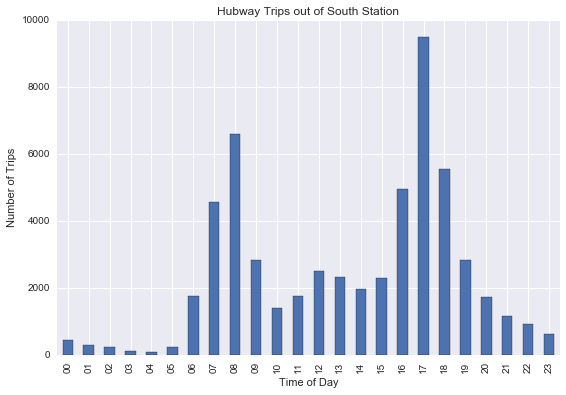

In [183]:
trip_data['start_hour'] = trip_data.start_date.str.split(' ').str[1].str.split(':').str[0]
trip_data[trip_data.strt_statn==22].groupby(['start_hour'])['seq_id'].count().plot(figsize = (9,6),kind='bar')
plt.title('Hubway Trips out of South Station')
plt.xlabel('Time of Day')
plt.ylabel('Number of Trips')

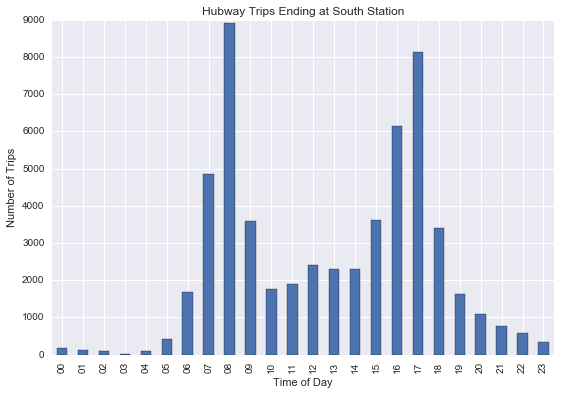

In [184]:
trip_data[trip_data.end_statn==22].groupby(['start_hour'])['seq_id'].count().plot(figsize = (9,6),kind='bar')
plt.title('Hubway Trips Ending at South Station')
plt.xlabel('Time of Day')
plt.ylabel('Number of Trips')

### Demographic Stats

In [17]:
trip_data.head()

,seq_id,hubway_id,status,duration,start_date,strt_statn,end_date,end_statn,bike_nr,subsc_type,zip_code,birth_date,gender
0,1,8,Closed,9,7/28/2011 10:12:00,23.0,7/28/2011 10:12:00,23.0,B00468,Registered,'97217,1976.0,Male
1,2,9,Closed,220,7/28/2011 10:21:00,23.0,7/28/2011 10:25:00,23.0,B00554,Registered,'02215,1966.0,Male
2,3,10,Closed,56,7/28/2011 10:33:00,23.0,7/28/2011 10:34:00,23.0,B00456,Registered,'02108,1943.0,Male
3,4,11,Closed,64,7/28/2011 10:35:00,23.0,7/28/2011 10:36:00,23.0,B00554,Registered,'02116,1981.0,Female
4,5,12,Closed,12,7/28/2011 10:37:00,23.0,7/28/2011 10:37:00,23.0,B00554,Registered,'97214,1983.0,Female


In [34]:
trip_data['age'] = 2017 - trip_data.birth_date

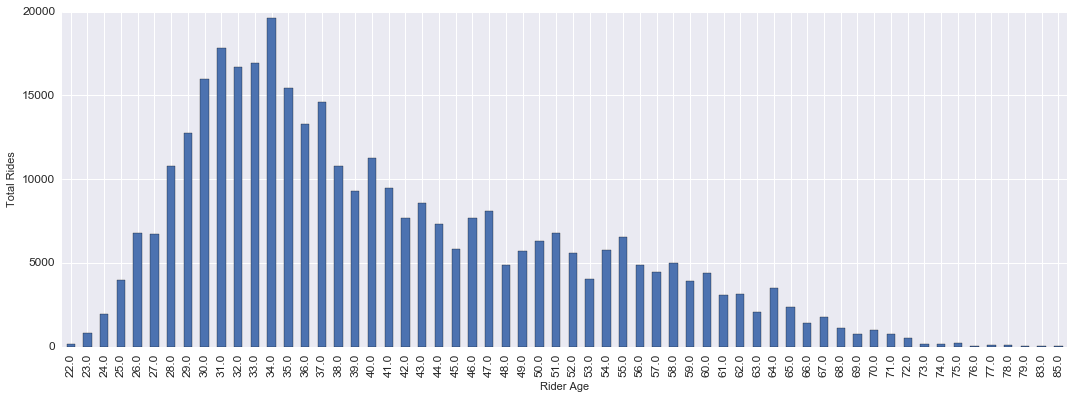

In [37]:
trip_data.groupby(['age'])['seq_id'].count().plot(kind='bar',figsize=(18,6),fontsize=12)
plt.ylabel('Total Rides')
plt.xlabel('Rider Age')

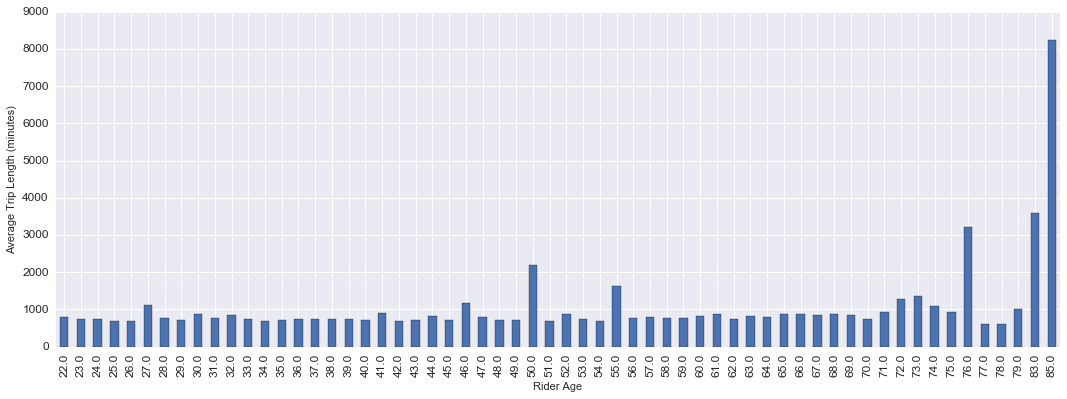

In [39]:
trip_data.groupby(['age'])['duration'].mean().plot(kind='bar',figsize=(18,6),fontsize=12)
plt.ylabel('Average Trip Length (minutes)')
plt.xlabel('Rider Age')

In [41]:
trip_data.groupby(['gender'])['duration'].mean()

gender
Female    814.490894
Male      706.910724
Name: duration, dtype: float64

In [42]:
trip_data.groupby(['gender'])['seq_id'].count()

gender
Female    271700
Male      834714
Name: seq_id, dtype: int64

In [45]:
trip_data.groupby(['gender'])['age'].mean()

gender
Female    39.302443
Male      41.167529
Name: age, dtype: float64